In [3]:
import networkx as nx
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix, diags, random
import matplotlib.pyplot as plt

In [52]:
def erdos_renyi_graph(n, L):
    """an optimized way to generate erdos renyi random graph

    Args:
        n (int): number of nodes  
        L (int): number of edges

    Returns:
        scipy.sparse.csr_matrix : edge list representing the erdos renyi random graph
    """
    nodeList = range(n)
    # generate random src endpoint list 
    srcList = np.random.choice(nodeList, L)
    # generate random dst endpoint list
    dstList = np.random.choice(nodeList, L)
    # create an optimize matrix, exploiting the sparse representation
    A = csr_matrix((np.ones(L), (srcList, dstList)), shape=(n,n))
    # 
    A = (A + A.T).sign() - diags(A.diagonal())
    return A



# Define a method to create the barabasi method

In [1]:
def barabasi_albert_graph(n, m, clique_size=4, alpha=1):
	"""_summary_

	Args:
		n (int): number of nodes in graph
		m (int): number of links for each nodes NB: m>=n
		clique_size (int, optional): default size of starting clique. Defaults to 4.
		alpha (int, optional): valore che va a modellare la non linearità: se alpha = 1 allora ho il caso di 
		base di comportamento lineare (quello di base di barabasi). se a>2 allora do moltissima 
		importanza al valore di k: pochi nodi diventano super hub. altrimenti se a<1 alora ho
		la power low che cresce piu lineare e quindi ho tutti i nodi che tendono a 
		avere una distribuzione dei degree più lineari (ion scala logaritmica ovviamente). Defaults to 1.

	Returns:
		scipy.sparse.lil_matrix:  The Barabasi graph created
	"""
	
	assert(m<=clique_size and n>=clique_size) #the clique to start is made with four nodes...

	#clicque of clique_size nodes, done with a sparse matrix of size m0xmo
	ones = np.ones(n) #lo uso solo per andare a calcolare i degree dei vari nodi nella mia matrice
	#creo la lista dei nodi 
	nodeList = np.arange(n)
	#crwo matrice di adiacenza
	AdjacentMatrix = lil_matrix((n,n))
	
	#creo una clicca completa
	AdjacentMatrix[0:clique_size,0:clique_size] = 1
	AdjacentMatrix.setdiag(0)


	for i in range(clique_size,n):
		#calcolo il degree vector
		k = AdjacentMatrix[:i,:i] @ ones[:i] #con la @ faccio prodotto vettoriale
		#Vado a cambiare come sono calcolate le probabilità in base a come 
		#vado a passare il parametro ext
		

		probs = k**alpha / sum(k**alpha)

		
		#calcolo i target di aggiunta per il nodo i
		#seleziono m archi, ognuno dei quali è in nodeList e viene selezionato
		#con probabilità probs_i. il replace fa in modo che una volta preso non 
		#viene rimesso in nodeList e quindi non viene messo!
		destList = np.random.choice(nodeList[:i], m, p=probs, replace=False)
		AdjacentMatrix[i, destList] = AdjacentMatrix[destList, i] =1

	
	return AdjacentMatrix


#  check that the barabasi matrix is symmetric

It is as, when we build the matrix, we assign the value 1 in a symmetric way!

# Plot the degree distribution and check that it decays with $k^{-3}$

In [4]:
G = barabasi_albert_graph(1000,8,10, alpha=1) #con a=1 abbiamo un comportamento di base

(array([832., 101.,  32.,  12.,   4.,   3.,   6.,   3.,   5.,   2.]),
 array([  8.,  21.,  34.,  47.,  60.,  73.,  86.,  99., 112., 125., 138.]),
 <BarContainer object of 10 artists>)

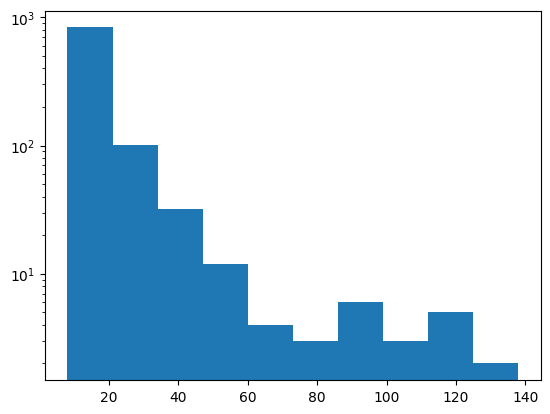

In [8]:
#estraggo i gradi del grafico
k = G @ np.ones(1000)
plt.hist(k, log=True)

Text(0, 0.5, 'Frequency')

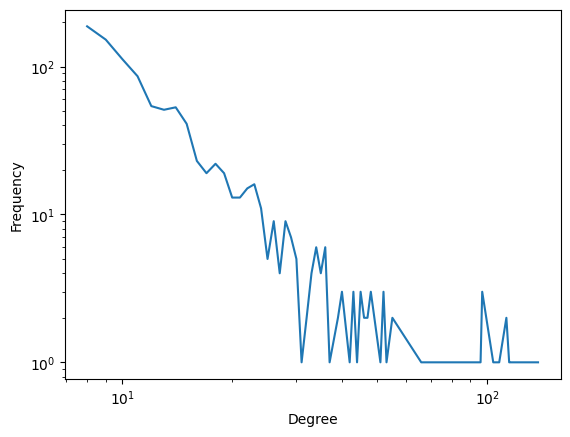

In [6]:
x,y = np.unique(k, return_counts=True)
plt.loglog(x,y)
plt.xlabel("Degree")
plt.ylabel("Frequency")

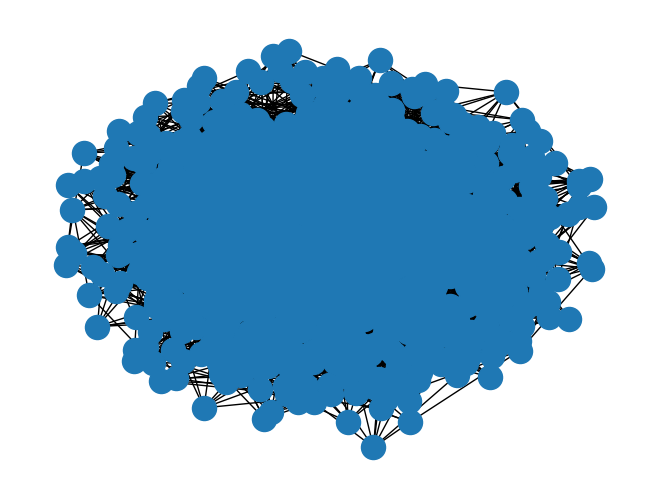

In [57]:
#Plot del grafico con networkX

nxG = nx.from_scipy_sparse_array(G)
nx.draw(nxG)

# Realizzare i task 1 e 2 su un grafo reale, se applicabile

In [4]:
#apro il file
f = open("facebook_combined.txt", "r") 
lines = f.readlines()
f.close()

len_lines = len(lines)

#inizializzo i vettori che vanno a contenere le cose (solo per efficenza)
weights = np.ones(len_lines)
srcList = np.zeros(len_lines)
destList = np.zeros(len_lines)

#Vado a splittare ogni linea, e con enumerate ottengo sia un 
#indice della linea che la linea stessalen_lines
for idx, line in enumerate(lines):
    srcList[idx], destList[idx] = line.split(' ')

#creo la matrice sparsa di adiacenza
A = csr_matrix((weights, (srcList,destList)), shape=(4039,4039))
#NB: la matrice di adiacenza è solamente la triangolare perchè il
#grafo è indiretto e quidni ho solo una coppia (a,b) e non anche (b,a)!

#make it symetric
A = A+A.transpose()

## Controlare se la matrice di adiacenza è simmetrica
SI LO è per definizinoe del grafo indiretto

## Plot the degree distribution

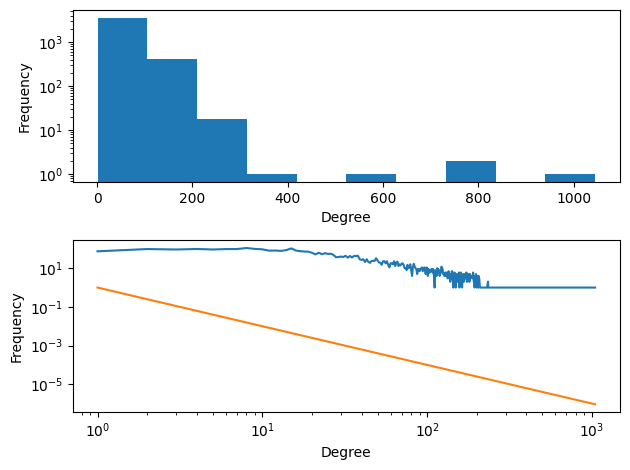

In [5]:
k = A @ np.ones(4039) #calcolo le somme dei vari degree per ogni nodo

#faccio due subplot
f, ax = plt.subplots(2) #ottengo in ax 2 subplots, in f ho la figura che non mi interessa...
#se volessi vedere l'imamgine farei tipo f.show()

x, y = np.unique(k, return_counts=True)

ax[0].hist(k, log=True)
ax[1].loglog(x, y) #la mia degree distribution
ax[1].loglog(x, x**(-2)) #power law plottata

ax[0].set_xlabel("Degree")
ax[1].set_xlabel("Degree")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

f.tight_layout()



Abbiamo quindi verificato che la degree distribution non decade con $k^{-3}$

## Verificare il friendship paradox

In [67]:
kappa = np.mean(k**2)/ np.mean(k)**2

kappa


2.4391706810359515